# Practically Perfect Data Overview

This notebook is a brief overview of the data provided in support of the manuscript.  For a full description of how the raw data are generated, please see that article when/if it is published.

The data provided are generated by thresholding the raw practically perfect data using common SPC product probability thresholds.  Each variable within the netcdf file represents the grids "activated" by each threshold for each daily period.  In other words, these grids would be within that particular contour line. 'pp_qt' is just the combination of all of these, and contains values from 0 (< 2%) to 7 (>= 60 %).  Not all of these data are used in the manuscript.

Read in the tornado day data as an example:

In [1]:
import xarray as xr

dset = xr.open_dataset('../data/tor_day_footprints_79-18_sid-212_grid.nc')
coords = xr.open_dataset('../data/nam212.nc')

lats = coords.gridlat_212.values
lons = coords.gridlon_212.values

dset

<xarray.Dataset>
Dimensions:  (time: 14610, x: 185, y: 129)
Coordinates:
  * x        (x) int64 0 1 2 3 4 5 6 7 8 ... 176 177 178 179 180 181 182 183 184
  * y        (y) int64 0 1 2 3 4 5 6 7 8 ... 120 121 122 123 124 125 126 127 128
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2018-12-31
Data variables:
    pp_02    (time, y, x) uint8 ...
    pp_05    (time, y, x) uint8 ...
    pp_10    (time, y, x) uint8 ...
    pp_15    (time, y, x) uint8 ...
    pp_30    (time, y, x) uint8 ...
    pp_45    (time, y, x) uint8 ...
    pp_60    (time, y, x) uint8 ...
    pp_qt    (time, y, x) uint8 ...

In other words, this dataset contains the spatial extent of 2%, 5%,.. 60%  PP probabilities each day from 1979 to 2017.

We can use xarray to find the most active day as far as spatial extent of a 2% risk very easily:

In [2]:
tor_area = dset.pp_05.sum(('x', 'y')) * 1600

tor_area.sortby(tor_area, ascending=False)

<xarray.DataArray 'pp_05' (time: 14610)>
array([1640000, 1452800, 1308800, ...,       0,       0,       0], dtype=uint32)
Coordinates:
  * time     (time) datetime64[ns] 2011-04-27 2011-05-25 ... 1979-01-03

This shows that April 27th 2011 had the largest extent of 5% PP probability at 1025 grids (~1,640,000 sq. km).

We can put these data into tabular form for each threshold and make a top 10 list.

In [3]:
import pandas as pd

tor_area = dset.sum(('x', 'y'))

dres = {'Rank':list(range(1, 11)), 
        '2%':[], '5%':[], '10%':[], 
        '15%':[], '30%':[], '45%':[], 
        '60%':[]}

for thresh in ['pp_02', 'pp_05', 'pp_10', 'pp_15', 
               'pp_30', 'pp_45', 'pp_60']:

    dset_ = tor_area.sortby(tor_area[thresh], ascending=False)
    
    dtimes = [str(x.date()) for x in pd.to_datetime(dset_[thresh].time.values[:10])]
    areas = ["{:,}".format(int(1600*x)) for x in dset_[thresh].values[:10]]

    for date, area in list(zip(dtimes, areas)):
        
        if area == '0':
            dres[str(int(thresh[3:])) + "%"].append("-")
        else:
            dres[str(int(thresh[3:])) + "%"].append(date + " (" + area + ")")
        
df_table = pd.DataFrame.from_dict(dres)
df_table = df_table.set_index('Rank')
df_table[list(dres.keys())[1:]]

,2%,5%,10%,15%,30%,45%,60%
Rank,,,,,,,
1,"2011-04-27 (1,942,400)","2011-04-27 (1,640,000)","2011-04-27 (1,286,400)","2011-04-27 (1,118,400)","2011-04-27 (835,200)","2011-04-27 (633,600)","2011-04-27 (473,600)"
2,"2011-05-25 (1,812,800)","2011-05-25 (1,452,800)","2011-05-25 (1,140,800)","2011-05-25 (913,600)","2011-04-26 (622,400)","2011-04-26 (502,400)","2011-04-26 (403,200)"
3,"1994-04-26 (1,787,200)","2004-05-30 (1,308,800)","2004-05-30 (1,025,600)","2004-05-30 (819,200)","2011-05-25 (574,400)","2003-05-04 (438,400)","2003-05-04 (344,000)"
4,"2011-04-26 (1,771,200)","1994-04-26 (1,305,600)","2003-05-06 (940,800)","2011-04-26 (808,000)","2004-05-30 (568,000)","2007-05-05 (419,200)","1999-01-21 (305,600)"
5,"1981-06-21 (1,737,600)","2003-05-06 (1,256,000)","2002-11-10 (936,000)","2002-11-10 (760,000)","2003-05-04 (542,400)","2004-05-30 (398,400)","2007-05-05 (300,800)"
6,"2003-05-06 (1,648,000)","1982-04-02 (1,251,200)","1994-04-26 (931,200)","2004-05-29 (723,200)","2007-05-05 (536,000)","2011-05-25 (369,600)","2010-06-17 (297,600)"
7,"1993-06-08 (1,643,200)","2011-04-26 (1,241,600)","2011-04-26 (923,200)","2010-10-26 (721,600)","2008-02-05 (478,400)","2008-02-05 (366,400)","2008-02-05 (296,000)"
8,"1982-04-02 (1,624,000)","1993-06-08 (1,208,000)","1982-04-02 (905,600)","2003-05-04 (720,000)","2004-05-29 (475,200)","1999-01-21 (361,600)","2012-03-02 (268,800)"
9,"2004-05-30 (1,587,200)","2002-11-10 (1,206,400)","1995-05-18 (872,000)","2003-05-06 (712,000)","2002-11-10 (467,200)","2004-11-23 (353,600)","2011-04-19 (264,000)"


### We can look at the spatial coverage of "event days" by counting how often a grid cell has a 5% or greater value

This can be demonstrated using data from the most extensive 3 day period (April 25th - April 27th 2011)

In [4]:
dset_ = dset.sel(time=slice('2011-04-25', '2011-04-27'))

dset_

<xarray.Dataset>
Dimensions:  (time: 3, x: 185, y: 129)
Coordinates:
  * x        (x) int64 0 1 2 3 4 5 6 7 8 ... 176 177 178 179 180 181 182 183 184
  * y        (y) int64 0 1 2 3 4 5 6 7 8 ... 120 121 122 123 124 125 126 127 128
  * time     (time) datetime64[ns] 2011-04-25 2011-04-26 2011-04-27
Data variables:
    pp_02    (time, y, x) uint8 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    pp_05    (time, y, x) uint8 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    pp_10    (time, y, x) uint8 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    pp_15    (time, y, x) uint8 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    pp_30    (time, y, x) uint8 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    pp_45    (time, y, x) uint8 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    pp_60    (time, y, x) uint8 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    pp_qt    (time, y, x) uint8 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0

Plot the data subset

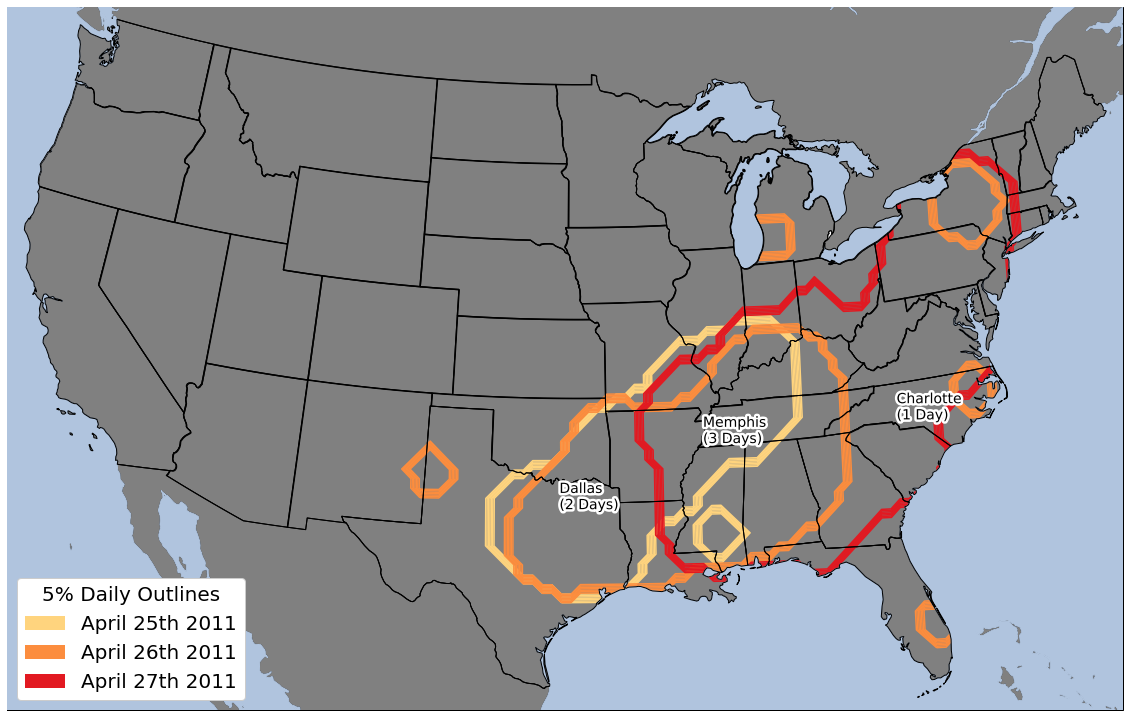

In [5]:
import matplotlib.pyplot as plt
from map_helper import *
import matplotlib.patheffects as PathEffects
from matplotlib.patches import Patch
import numpy as np

%matplotlib inline
plt.rcParams['figure.figsize'] = 20, 20

from_proj = ccrs.PlateCarree()
projection = cartopy.crs.AlbersEqualArea(central_longitude=-96, central_latitude=37.5, false_easting=0.0, 
                            false_northing=0.0, standard_parallels=(29.5, 45.5), globe=None)

ax = plt.axes(projection=projection)
ax.set_extent([-120, -73, 25, 50], crs=from_proj)
ax = draw_geography(ax)

ax.contour(lons, lats, dset_.pp_05.values[0], colors=['#FFD47E'], transform=from_proj)
ax.contour(lons, lats, dset_.pp_05.values[1], colors=['#FC8D3E'], transform=from_proj)
ax.contour(lons, lats, dset_.pp_05.values[2], colors=['#E21921'], transform=from_proj)

a25 = Patch(facecolor='#FFD47E', edgecolor=None, label="April 25th 2011")
a26 = Patch(facecolor='#FC8D3E', edgecolor=None, label="April 26th 2011")
a27 = Patch(facecolor='#E21921', edgecolor=None, label="April 27th 2011")

cax = ax.legend(handles=[a25, a26, a27], framealpha=1, 
                title="5% Daily Outlines", prop={'size': 20}, loc=3)


txt = ax.text(-90.049, 35.1495, 'Memphis\n(3 Days)', transform=from_proj, fontsize=14, zorder=15)
txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])

txt = ax.text(-96.7970, 32.7767, 'Dallas\n(2 Days)', transform=from_proj, fontsize=14, zorder=15)
txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])

txt = ax.text(-80.8431, 35.2271, 'Charlotte\n(1 Day)', transform=from_proj, fontsize=14, zorder=15)
txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
                      
cax.set_zorder(10)
cax.get_title().set_fontsize('20')

We can sum over the `time` dimension and then plot the result.  The map is then the count of days over that period during which that grid had a 5% or greater PPer probability.

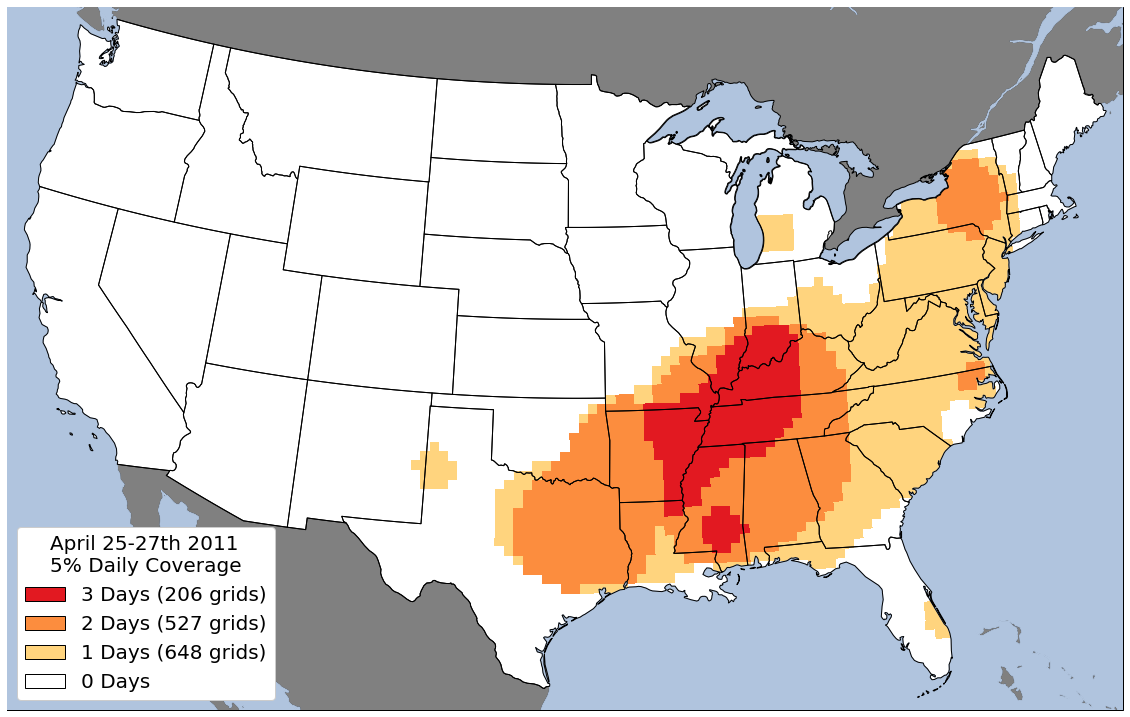

In [6]:
from matplotlib.colors import BoundaryNorm, ListedColormap
plt.rcParams['figure.figsize'] = 20, 20

dsub = dset_['pp_05'].sum('time')

def get_handles(result_grid):
    legend_handles = [Patch(facecolor=dy_colors[0], edgecolor='k',
                           label="0 Days"),
                      Patch(facecolor=dy_colors[1], edgecolor='k',
                           label="1 Days ({} grids)".format(np.sum(result_grid==1))),
                      Patch(facecolor=dy_colors[2], edgecolor='k',
                           label="2 Days ({} grids)".format(np.sum(result_grid==2))),
                      Patch(facecolor=dy_colors[3], edgecolor='k',
                           label="3 Days ({} grids)".format(np.sum(result_grid==3)))]
    
    return legend_handles

dy_colors = ['#ffffff', '#FFD47E', '#FC8D3E', '#E21921']
cmap = ListedColormap(dy_colors)
norm = BoundaryNorm([0,1,2,3,100], ncolors=cmap.N)

ax = plt.axes(projection=projection)
ax.set_extent([-120, -73, 25, 50], crs=from_proj)
ax = draw_geography(ax)

mmp = ax.pcolormesh(lons, lats, dsub.values, zorder=6, cmap=cmap, norm=norm, transform=ccrs.PlateCarree())

legend_handles = get_handles(dsub.values)
cax = ax.legend(handles=legend_handles[::-1], framealpha=1, 
                title="April 25-27th 2011\n5% Daily Coverage", prop={'size': 20}, loc=3)

cax.set_zorder(10)
cax.get_title().set_fontsize('20')